In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

In [2]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import re
import os
import wave
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
from IPython.display import Audio, display
import librosa as lib
import librosa.display

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Model

from sklearn.model_selection import train_test_split

TensorFlow version: 2.12.0


In [5]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Speech_Emotion/Crema"
AUDIO_PATH = "/content/drive/MyDrive/Colab Notebooks/Speech_Emotion/Crema/1001_DFA_ANG_XX.wav"

In [6]:
def zeroCrossingRate(audio):
  return lib.feature.zero_crossing_rate(audio).mean()

In [7]:
def energy(audio):
  # using a spectrogram will give a more accurate representation
  # of energy over time because its frames can be windowed
  S, phase = lib.magphase(lib.stft(audio))
  return lib.feature.rms(S=S).mean()

In [22]:
def melSpectrogram(audio, sr):
  mel_spectrogram = lib.feature.melspectrogram(y=audio, sr=sr, n_fft=200)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  return log_mel_spectrogram.mean()

In [9]:
def chromaStft(audio, sr):
  stft = np.abs(librosa.stft(audio))
  return librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).mean()

In [10]:
def mfcc(data, sr):
  return librosa.feature.mfcc(y=data, sr=sr, n_fft=200).mean()

In [19]:
def tonnetz(data, sr):
  return librosa.feature.tonnetz(y=data, sr=sr).mean();

In [12]:
def playAudio(audio_file):
  audio = AudioSegment.from_wav(audio_file)
  # Play the audio
  audio.export('temp_audio.wav', format='wav')
  audio_data = open('temp_audio.wav', 'rb').read()
  display(Audio(audio_data))
  # Delete the temporary audio file
  os.remove('temp_audio.wav')

In [13]:
def visualize_waveform(audio, sr):
    plt.figure(figsize=(12, 4))
    plt.plot(audio)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()

In [14]:
def loadAndListenToAudiolib(dataset_path, class_name):
  D, Y = [], []
  # defining the regular expression
  audio_files = glob.glob(os.path.join(dataset_path, f"*{class_name}*.wav"))
  print(class_name)
  # play the audio
  playAudio(audio_files[0])
  # plot the spectrum
  audio, sr = lib.load(audio_files[0])
  visualize_waveform(audio, sr)
  # plotWaveform(audio_files[0], class_name)
  for audio_file in audio_files: 
    # load the audio file
    audio, sr = lib.load(audio_file)
    # extract zero crossing rate
    zcr = zeroCrossingRate(audio)
    # extract energy
    rms = energy(audio)
    # extract mel spectrogram
    mel_spec = melSpectrogram(audio, sr)
    # chroma stft
    cs = chromaStft(audio, sr)
    mfc = mfcc(audio, sr)
    ton = tonnetz(audio, sr)
    # combined_features = np.concatenate(([zcr, rms], mel_spec.flatten()))
    combined_features = [zcr, rms, mel_spec, cs, mfc, ton]
    # print(combined_features)
    D.append(combined_features)
    Y.append(class_name)
  return D, Y

In [15]:
def loadDatalib(PATH):
  D, Y = [], []
  classes = ["SAD", "ANG", "DIS", "FEA", "HAP", "NEU"]
  for cls in classes: 
    d, y = loadAndListenToAudiolib(PATH, cls)
    # D = np.concatenate((D, d))
    D.extend(d)
    Y = np.concatenate((Y, y))
  return D, Y

SAD


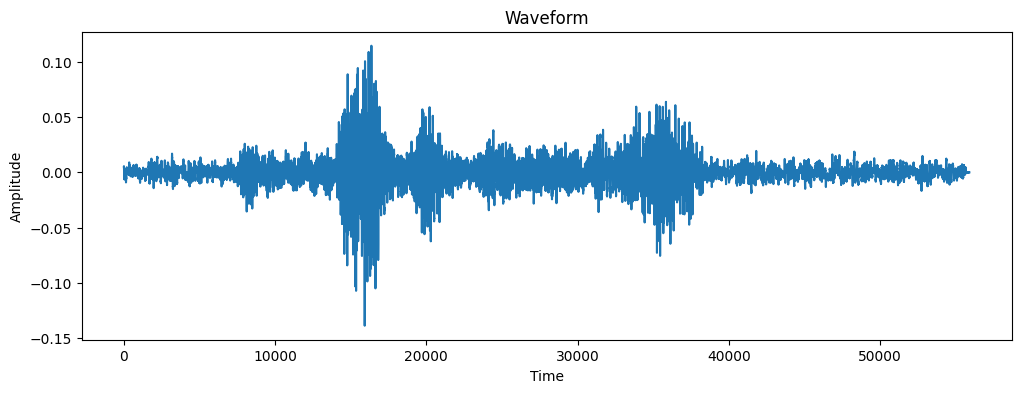

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=667
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=787
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=506
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=785
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=598
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: 

ANG


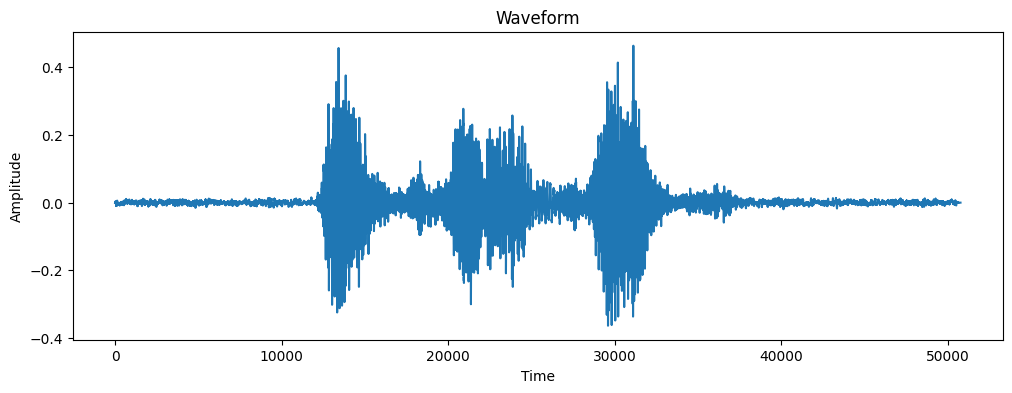

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=587
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=529
  warnings.warn(


DIS


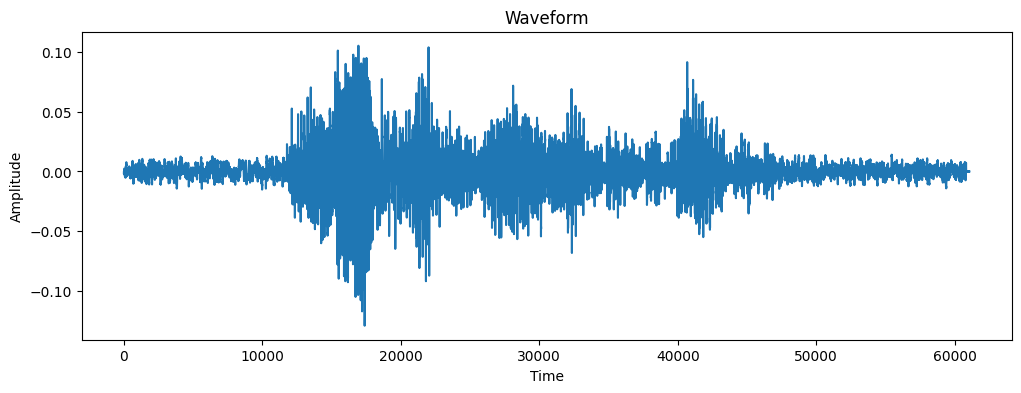

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=495
  warnings.warn(


FEA


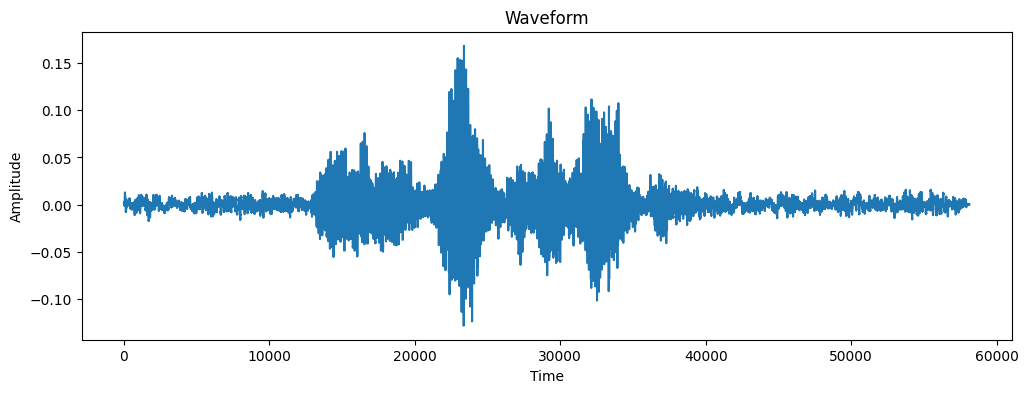

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=483
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=472
  warnings.warn(


HAP


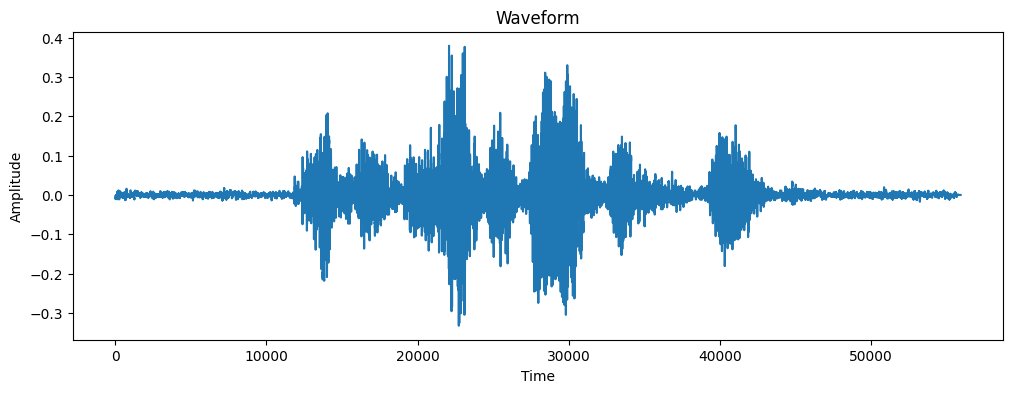

NEU


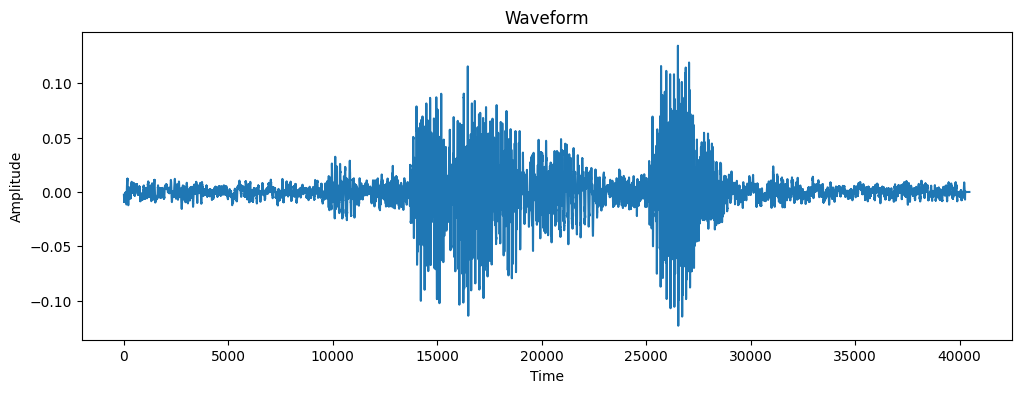

In [23]:
D, Y = loadDatalib(PATH)

In [24]:
D = np.array(D)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(D, Y, test_size=0.2, random_state=47, shuffle=True)

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3904899135446686


In [27]:
D.shape

(3470, 6)

In [28]:
X_train.shape

(2776, 6)

In [48]:
X_train2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test2 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_train2.shape

(2776, 6, 1)

In [68]:

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

ValueError: ignored

In [61]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 2774, 32)          128       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 1387, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 1385, 64)          6208      
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 692, 64)          0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 44288)             0         
                                                                 
 dense_10 (Dense)            (None, 64)              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
history = model.fit(X_train2, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_test2, y_test))

Epoch 1/50


ValueError: ignored

In [44]:
X_train[1].shape

(6,)